In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,648 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 144611 files and d

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
from collections import Counter
import datetime

plt.rc('font', family='NanumBarunGothic')

In [3]:
path = "/content/drive/My Drive/최강1조-추천 시스템/데이터 수집/"

prod = pd.read_json(path + "all_prod_data.json")
review = pd.read_json(path + "all_review_data.json")
satisfaction = pd.read_json(path + "all_satisfaction_data.json")

# Production
모든 상품 정보

In [ ]:
prod.head()

,prod_idx,image,title,category,price,stocks,prod_satis,prod_url,buy_count
0,2865723582,http://th4.tmon.kr/thumbs/image/f32/0e0/a5e/b5...,[컬러푸드] 선착순20%할인쿠폰+해남 후기갑 꿀고구마 중상1kg 정품\n한입/특상/...,"[식품·건강, 채소, 감자·고구마·당근·뿌리채소, 고구마]",6900,1,4.4,http://www.tmon.co.kr/deal/2865723582\n,106276
1,512851998,http://th1.tmon.kr/thumbs/image/c8d/da8/a8e/99...,[샐러드미인] 간편한 샐러드/베이글 외 33종,"[식품·건강, 채소, 상추·깻잎·쌈채소·샐러드, 샐러드]",900,1,4.5,http://www.tmon.co.kr/deal/512851998\n,61337
2,760761146,http://th3.tmon.kr/thumbs/image/89e/370/471/8e...,[팜에이트] 간편한 소포장부터 든든한 한끼 샐러드까지 총14종,"[식품·건강, 채소, 상추·깻잎·쌈채소·샐러드, 샐러드]",1300,1,4.4,http://www.tmon.co.kr/deal/760761146\n,37744
3,212815213,http://image.ticketmonster.co.kr/deals/2015/06...,달콤해서 한입에 반한\n반시고구마 말랭이,"[식품·건강, 채소, 감자·고구마·당근·뿌리채소, 고구마]",1250,1,4.3,http://www.tmon.co.kr/deal/212815213\n,27041
4,3030712126,http://th1.tmon.kr/thumbs/image/154/93f/57b/e1...,[봉팔형님] 밤꿀고구마 중 1kg 외 꿀고구마 4종 크기별 모음 / 2개 구매시 3...,"[식품·건강, 채소, 감자·고구마·당근·뿌리채소, 고구마]",8900,1,4.4,http://www.tmon.co.kr/deal/3030712126\n,22321


#### 중복되는 상품
상품 내용이 다른 것도 있긴 하지만(가격 등), 대부분 같아서 중복되는 것은 제거

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


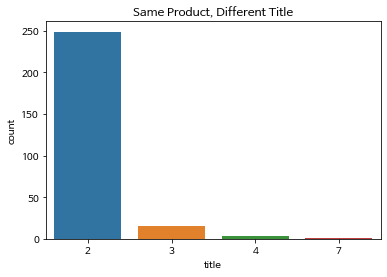

In [ ]:
prod_over_title = prod.groupby("prod_idx")["title"].count()[prod.reset_index().groupby("prod_idx")["index"].count() != 1]
sns.countplot(prod_over_title)
plt.title("Same Product, Different Title")
plt.show()

In [ ]:
prod_over_idx = list(prod_over_title.index)
for i in range(10):
    display(prod[prod.prod_idx == prod_over_idx[i]])
    print("\n\n")

,prod_idx,image,title,category,price,stocks,prod_satis,prod_url,buy_count
16988,427689130,http://img1.tmon.kr/cdn3/deals/2019/11/06/4276...,[늘품애] 황금빛 김이 가득\n광천도시락김 190원 외\n골라담기 모음전,"[식품·건강, 김치·반찬·국·쿠킹박스, 김·부각, 전장김]",190,1,4.6,http://www.tmon.co.kr/deal/427689130\n,650161
31760,427689130,http://img1.tmon.kr/cdn3/deals/2019/11/06/4276...,[늘품애] 황금빛 김이 가득\n광천도시락김 190원 외\n골라담기 모음전,"[식품·건강, 김치·반찬·국·쿠킹박스, 김·부각, 전장김]",190,1,4.6,http://www.tmon.co.kr/deal/427689130\n,650161
37895,427689130,http://img1.tmon.kr/cdn3/deals/2019/11/06/4276...,[늘품애] 황금빛 김이 가득\n광천도시락김 190원 외\n골라담기 모음전,"[식품·건강, 김치·반찬·국·쿠킹박스, 김·부각, 전장김]",200,1,4.6,http://www.tmon.co.kr/deal/427689130\n,650161


,prod_idx,image,title,category,price,stocks,prod_satis,prod_url,buy_count
16997,648232986,http://th4.tmon.kr/thumbs/image/e77/b6b/cd4/09...,[대천김] 최신제조 대천김 모음전 무료배송,"[식품·건강, 김치·반찬·국·쿠킹박스, 김·부각, 전장김]",9900,1,4.5,http://www.tmon.co.kr/deal/648232986\n,51371
31763,648232986,http://th4.tmon.kr/thumbs/image/e77/b6b/cd4/09...,[대천김] 최신제조 대천김 모음전 무료배송,"[식품·건강, 김치·반찬·국·쿠킹박스, 김·부각, 전장김]",9900,1,4.5,http://www.tmon.co.kr/deal/648232986\n,51372


,prod_idx,image,title,category,price,stocks,prod_satis,prod_url,buy_count
12,759718058,http://img2.tmon.kr/cdn3/deals/2019/07/30/7597...,[팜에이트] 토핑 샐러드 5종 1팩 골라담기,"[식품·건강, 채소, 상추·깻잎·쌈채소·샐러드, 샐러드]",4000,1,4.2,http://www.tmon.co.kr/deal/759718058\n,11092
2967,759718058,http://img2.tmon.kr/cdn3/deals/2019/07/30/7597...,[팜에이트] 토핑 샐러드 5종 1팩 골라담기,"[식품·건강, 채소, 상추·깻잎·쌈채소·샐러드, 샐러드]",4000,1,4.2,http://www.tmon.co.kr/deal/759718058\n,11092


,prod_idx,image,title,category,price,stocks,prod_satis,prod_url,buy_count
2,760761146,http://th3.tmon.kr/thumbs/image/89e/370/471/8e...,[팜에이트] 간편한 소포장부터 든든한 한끼 샐러드까지 총14종,"[식품·건강, 채소, 상추·깻잎·쌈채소·샐러드, 샐러드]",1300,1,4.4,http://www.tmon.co.kr/deal/760761146\n,37744
2888,760761146,http://th3.tmon.kr/thumbs/image/89e/370/471/8e...,[팜에이트] 간편한 소포장부터 든든한 한끼 샐러드까지 총14종,"[식품·건강, 채소, 상추·깻잎·쌈채소·샐러드, 샐러드]",1300,1,4.4,http://www.tmon.co.kr/deal/760761146\n,37738


,prod_idx,image,title,category,price,stocks,prod_satis,prod_url,buy_count
22584,902857034,http://th1.tmon.kr/thumbs/image/be5/234/562/dd...,싱가포르 전통 담백달콤한 카야잼\n카야하우스 카야잼 선물세트 무료배송,"[식품·건강, 밀가루·오일·소스·장류, 잼·시럽, 기타잼]",14800,1,4.6,http://www.tmon.co.kr/deal/902857034\n,751
38745,902857034,http://th1.tmon.kr/thumbs/image/be5/234/562/dd...,싱가포르 전통 담백달콤한 카야잼\n카야하우스 카야잼 선물세트 무료배송,"[식품·건강, 밀가루·오일·소스·장류, 잼·시럽, 기타잼]",14800,1,4.6,http://www.tmon.co.kr/deal/902857034\n,751


,prod_idx,image,title,category,price,stocks,prod_satis,prod_url,buy_count
17033,978641850,http://th4.tmon.kr/thumbs/image/2fc/c53/943/86...,"[바다원] 김/자반 모음전\n김밥김,김자반,부각,멸치","[식품·건강, 김치·반찬·국·쿠킹박스, 김·부각, 김자반]",14000,1,4.4,http://www.tmon.co.kr/deal/978641850\n,10771
31775,978641850,http://th4.tmon.kr/thumbs/image/2fc/c53/943/86...,"[바다원] 김/자반 모음전\n김밥김,김자반,부각,멸치","[식품·건강, 김치·반찬·국·쿠킹박스, 김·부각, 김자반]",14000,1,4.4,http://www.tmon.co.kr/deal/978641850\n,10771


,prod_idx,image,title,category,price,stocks,prod_satis,prod_url,buy_count
22900,1008962722,http://img2.tmon.kr/deals/2018/04/08/100896272...,[아르간뚜르아]식용아르간오일,"[식품·건강, 밀가루·오일·소스·장류, 식용유·올리브유·물엿, 식용유]",45000,1,5.0,http://www.tmon.co.kr/deal/1008962722\n,191
31758,1008962722,http://img2.tmon.kr/deals/2018/04/08/100896272...,[아르간뚜르아]식용아르간오일,"[식품·건강, 밀가루·오일·소스·장류, 식용유·올리브유·물엿, 식용유]",45000,1,5.0,http://www.tmon.co.kr/deal/1008962722\n,191


,prod_idx,image,title,category,price,stocks,prod_satis,prod_url,buy_count
23663,1051480746,http://img4.tmon.kr/deals/2018/04/21/105148074...,인산가 홍화씨분말 500g병,"[식품·건강, 밀가루·오일·소스·장류, 밀가루·소금·조미료, 소금]",67000,1,4.5,http://www.tmon.co.kr/deal/1051480746\n,47
31757,1051480746,http://img4.tmon.kr/deals/2018/04/21/105148074...,인산가 홍화씨분말 500g병,"[식품·건강, 밀가루·오일·소스·장류, 밀가루·소금·조미료, 소금]",67000,1,4.5,http://www.tmon.co.kr/deal/1051480746\n,47


,prod_idx,image,title,category,price,stocks,prod_satis,prod_url,buy_count
17100,1199938306,http://img1.tmon.kr/cdn3/deals/2019/08/19/1199...,광천김 달인 김병만 김선물세트 모음전,"[식품·건강, 김치·반찬·국·쿠킹박스, 김·부각, 전장김]",8900,1,4.6,http://www.tmon.co.kr/deal/1199938306\n,3408
31823,1199938306,http://img1.tmon.kr/cdn3/deals/2019/08/19/1199...,광천김 달인 김병만 김선물세트 모음전,"[식품·건강, 김치·반찬·국·쿠킹박스, 김·부각, 전장김]",8900,1,4.6,http://www.tmon.co.kr/deal/1199938306\n,3408


,prod_idx,image,title,category,price,stocks,prod_satis,prod_url,buy_count
17064,1374440910,http://img2.tmon.kr/deals/2018/07/16/137444091...,[에디샵] 와 싸다 지도표 성경김 골라담기\n전장김/식탁김/조각김/고추부각/누룽지 외,"[식품·건강, 김치·반찬·국·쿠킹박스, 김·부각, 전장김]",290,1,4.6,http://www.tmon.co.kr/deal/1374440910\n,6155
31791,1374440910,http://img2.tmon.kr/deals/2018/07/16/137444091...,[에디샵] 와 싸다 지도표 성경김 골라담기\n전장김/식탁김/조각김/고추부각/누룽지 외,"[식품·건강, 김치·반찬·국·쿠킹박스, 김·부각, 전장김]",290,1,4.6,http://www.tmon.co.kr/deal/1374440910\n,6155


In [4]:
prod.drop_duplicates("prod_idx", keep="first", inplace = True) # 전처리 - 중복 제거

In [5]:
all_category = list(np.unique(prod.category)) # 원본 데이터의 모든 카테고리
category = [[] for i in range(9)] # 9개의 지정된 카테고리
other_category = [] # 분류 안 된 나머지

for cate in all_category:
    if "채소" in cate: 
        category[0].append(cate)
    elif "정육·계란류" in cate or "축산물·축산가공" in cate: 
        category[1].append(cate)
    elif "쌀·잡곡" in cate or "쌀·잡곡·나물" in cate: 
        category[2].append(cate)
    elif "수산물·건어물" in cate or "해산물.건어물" in cate: 
        category[3].append(cate)
    elif "스낵·견과·빵·떡" in cate or "과자·간식" in cate or "견과 혼합세트" in cate: 
        category[4].append(cate)
    elif "밀가루·오일·소스·장류" in cate: 
        category[5].append(cate)
    elif "김치·젓갈·반찬류" in cate or "김치·반찬·국·쿠킹박스" in cate: 
        category[6].append(cate)
    elif "과일" in cate or "기타과일·세트" in cate or "곶감" in cate: 
        category[7].append(cate)
    elif "간편식·냉장·냉동" in cate or "즉석·간편식·면.소스" in cate or "라면·즉석밥·통조림" in cate: 
        category[8].append(cate)
    else: 
        other_category.append(cate)

In [6]:
category_name = ["채소","정육·계란류","쌀·잡곡","수산물·건어물","스낵·견과·빵·떡","밀가루·오일·소스·장류","김치·젓갈·반찬류","과일","간편식·냉장·냉동"]

In [7]:
all_category_list = [] # 정상적인 카테고리 모음
for i in range(9):
    all_category_list.extend(category[i])

In [ ]:
# 고찰 - 분류 안된 나머지 카테고리
pd.DataFrame(other_category)

,0,1,2,3
0,None,None,None,None
1,도서·교육·취미,DIY공예·아이디어,DIY·공예,DIY기타
2,도서·교육·취미,DIY공예·아이디어,디자인·아이디어,아이디어상품
3,도서·교육·취미,꽃배달,비누꽃·카네이션,사탕부케
4,도서·교육·취미,문구·사무용품,디자인문구·팬시,문구·팬시용품
5,롯데백화점,가구·생활,생활용품,생활잡화
6,생활·주방,생활잡화·공구,기타 생활잡화,기타 생활잡화
7,생활·주방,주방용품,커피용품·베이킹·와인,베이킹용품
8,스포츠,캠핑용품,숯·그릴·바비큐,숯
9,식품·건강,None,None,None


In [8]:
# df: 각 카테고리에 해당하는 데이터프레임 리스트
df = []
for i in range(9):
    df.append(prod[prod.category.apply(lambda x: x in category[i])])

In [9]:
for i in range(9):
    df[i]["category_num"] = i

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
prod = pd.concat([df[0], df[1], df[2], df[3], df[4], df[5], df[6], df[7], df[8]]) # 전처리 - 카테고리 번호 컬럼추가 및 다른 카테고리 제거

<Figure size 1800x1440 with 0 Axes>

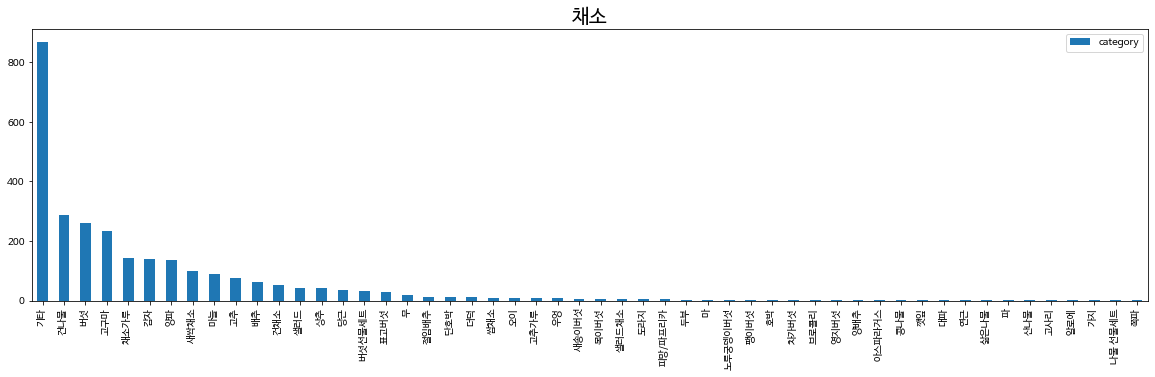

<Figure size 1800x1440 with 0 Axes>

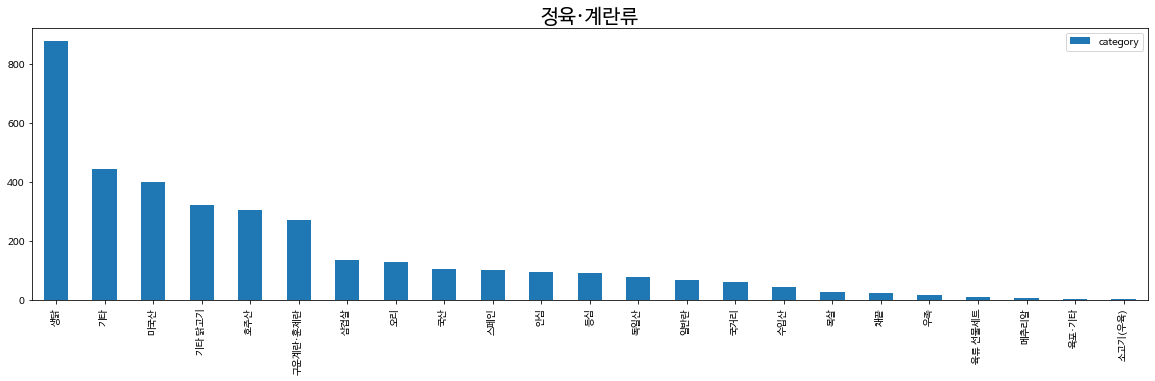

<Figure size 1800x1440 with 0 Axes>

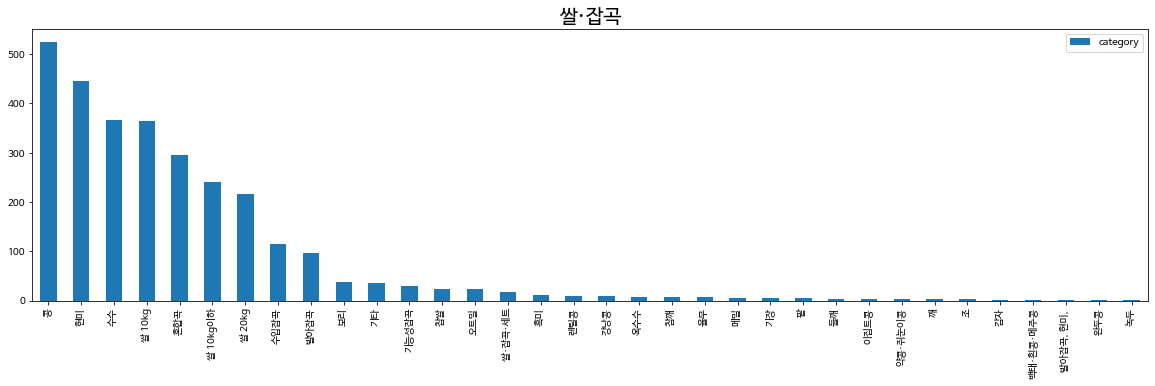

<Figure size 1800x1440 with 0 Axes>

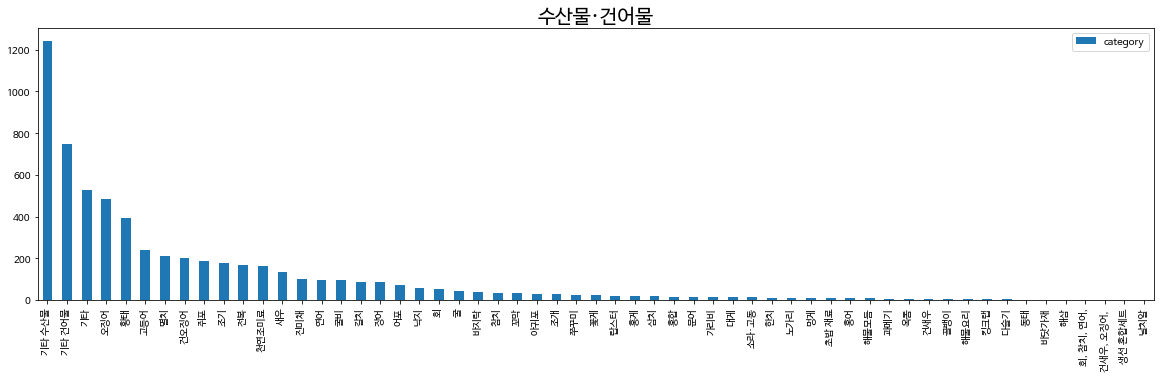

<Figure size 1800x1440 with 0 Axes>

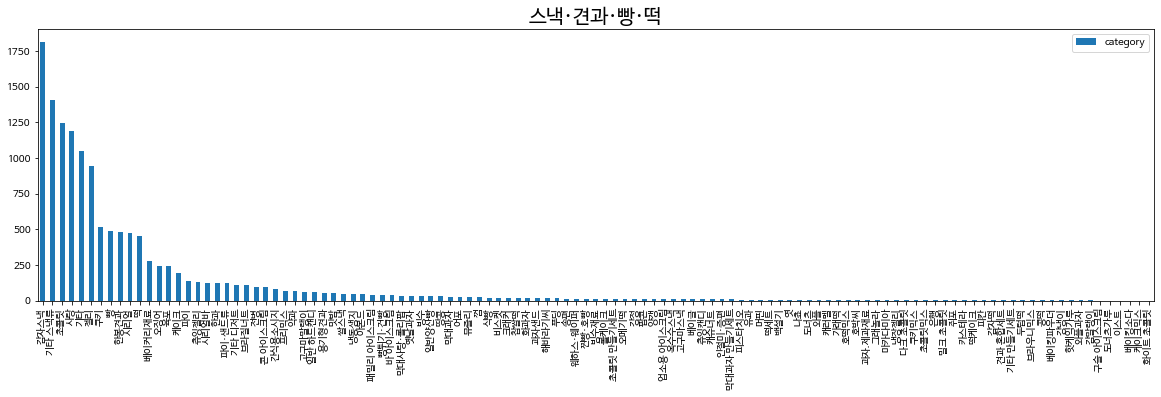

<Figure size 1800x1440 with 0 Axes>

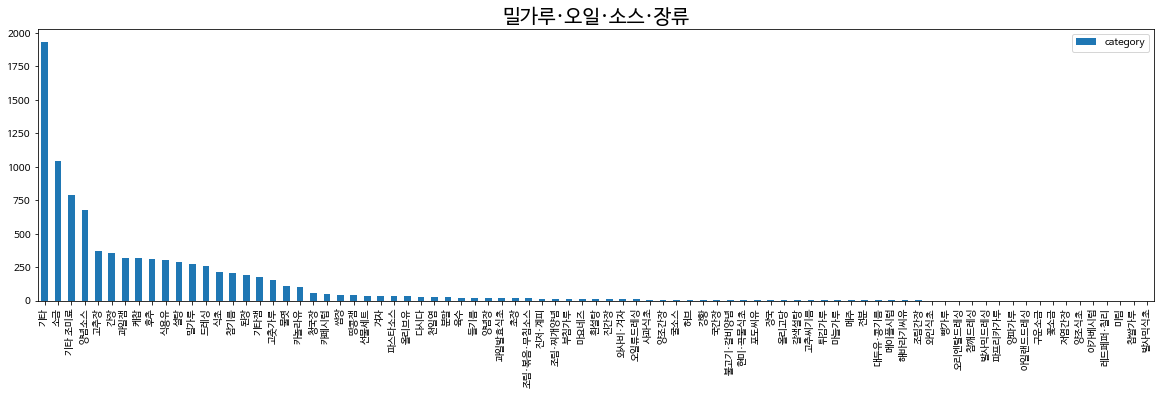

<Figure size 1800x1440 with 0 Axes>

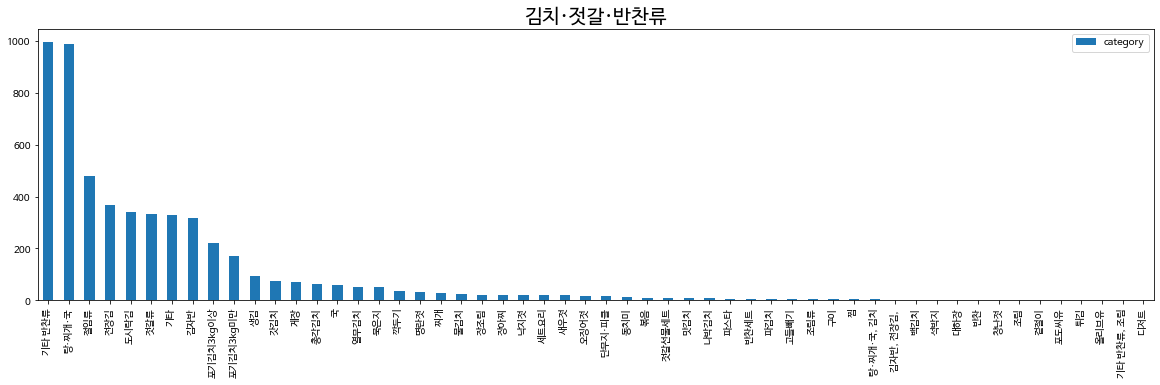

<Figure size 1800x1440 with 0 Axes>

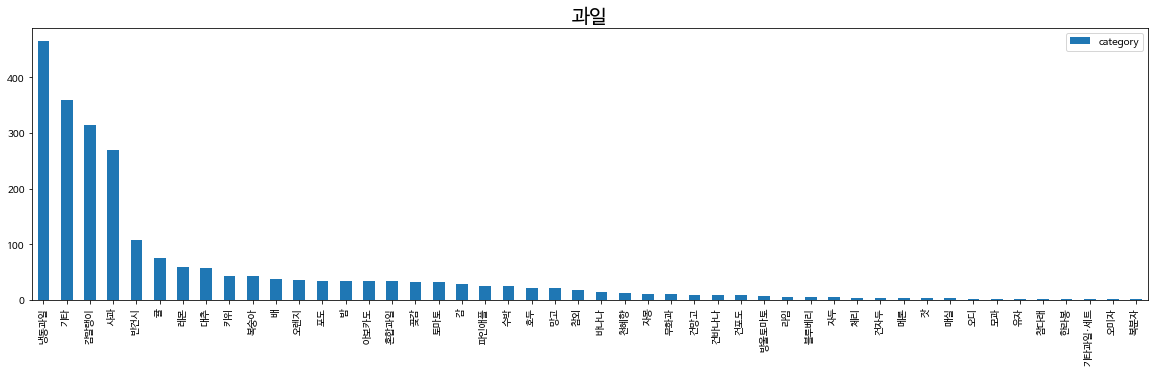

<Figure size 1800x1440 with 0 Axes>

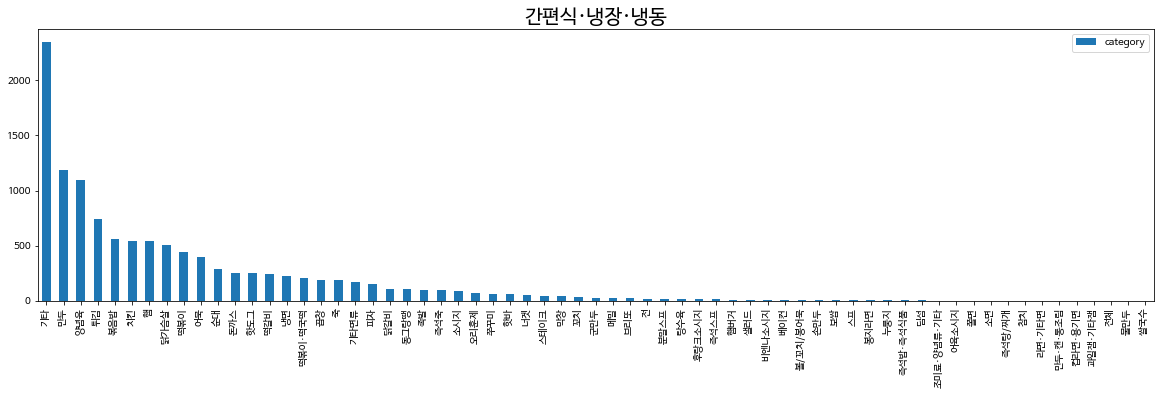

In [ ]:
def select_keyword(lst, eda = True):
    if lst[-1] != "":
        keyword = lst[-1].replace("\n", ", ")
    else:
        keyword = lst[-2].replace("\n", ", ")
    if eda == True:
        if len(keyword) > 20 : 
            return keyword[:10]
        else: 
            return keyword
    else:
        return keyword

for i in range(9):
    data = df[i]
    plt.figure(figsize = (25, 20))
    data_keyword = pd.DataFrame(data.category.apply(lambda x: select_keyword(x)).value_counts(ascending = False))
    data_keyword.plot(kind='bar', figsize=(20,5))
    # plt.xticks(rotation=60)
    plt.title(category_name[i], size = 20)
    plt.show()

In [12]:
prod["small_category"] = prod.category.apply(lambda x: select_keyword(x, eda = False)) # 전처리 - 세부 카테고리 컬럼 생성

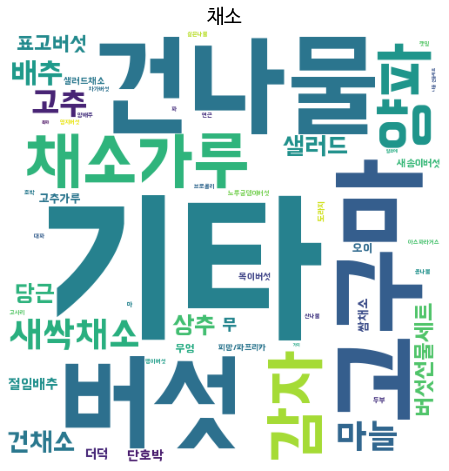

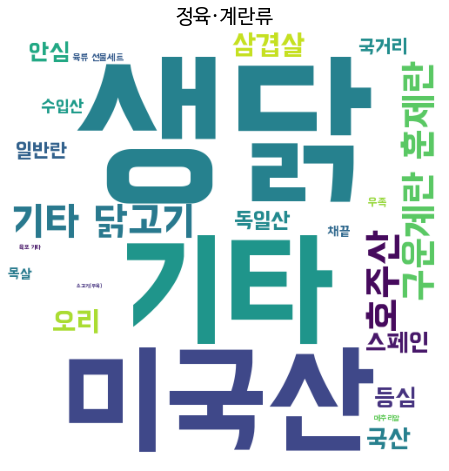

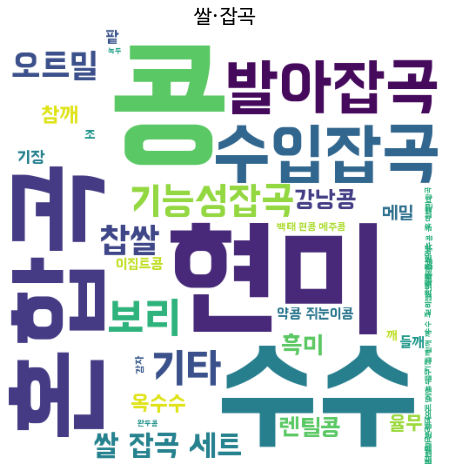

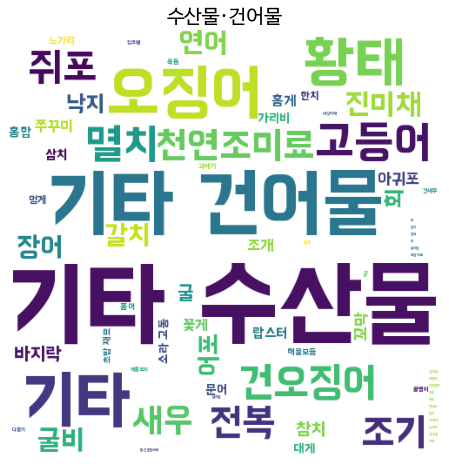

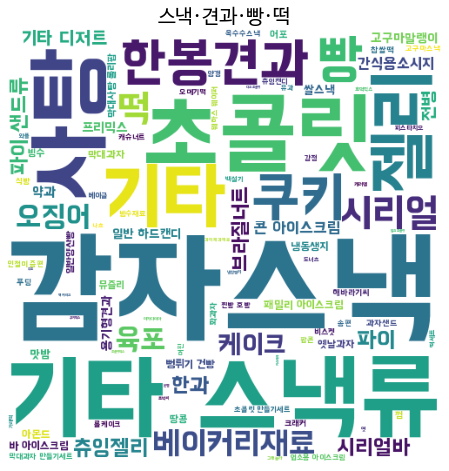

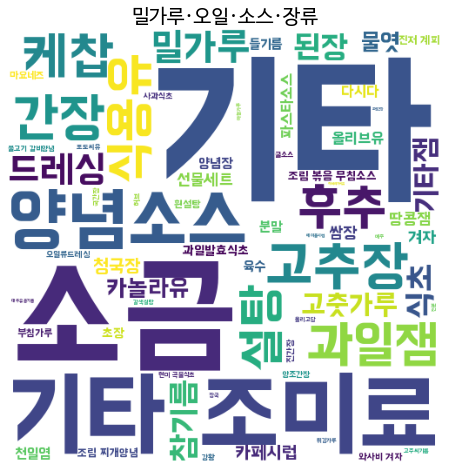

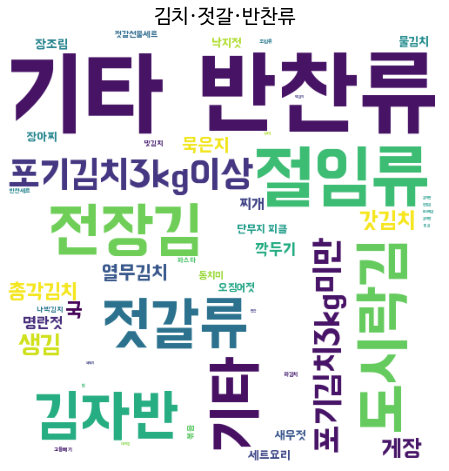

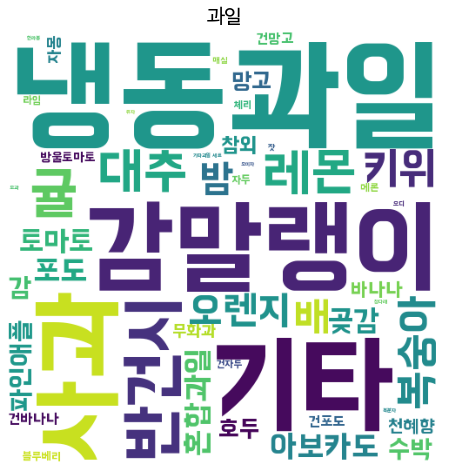

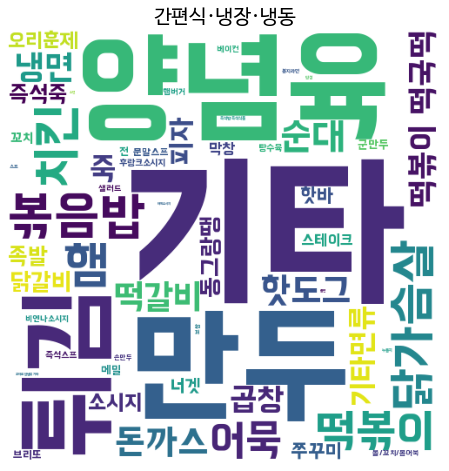

In [ ]:
for i in range(9):
    word_could_dict = Counter(list(df[i].category.apply(lambda x: x[-1]))) 
    wordcloud = WordCloud(width = 500, 
                        height = 500,
                        max_words = 100, 
                        background_color="white", 
                        max_font_size = 200,
                        font_path = '/content/drive/My Drive/BMHANNAPRO.TTF').generate_from_frequencies(word_could_dict)
    plt.figure(figsize=(15,8))
    plt.title(category_name[i], size=20)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    # plt.savefig('yourfile.png', bbox_inches='tight')
    # plt.close()

#### 가격
이상치 제거 및 시각화

In [14]:
prod[prod.price == 9999999]

,prod_idx,image,title,category,price,stocks,prod_satis,prod_url,buy_count,category_num,small_category
1372,1906289746,http://img1.tmon.kr/cdn2/deals/2019/03/21/1906...,강원도 양구 건시래기 1kg,"[식품·건강, 채소, 상추·깻잎·쌈채소·샐러드, 기타]",9999999,1,0.0,http://www.tmon.co.kr/deal/1906289746\n,6,0,기타
33263,1493754382,http://img2.tmon.kr/deals/2018/09/13/149375438...,동해 오징어다리,"[식품·건강, 수산물·건어물, 오징어·주꾸미·연체류, 오징어]",9999999,1,4.8,http://www.tmon.co.kr/deal/1493754382\n,29,3,오징어


In [13]:
prod[prod.price == 0]

,prod_idx,image,title,category,price,stocks,prod_satis,prod_url,buy_count,category_num,small_category
14605,779504942,http://img2.tmon.kr/deals/2017/12/06/779504942...,[청도감] 감말랭이 1봉 48g 한정수량 초특가 행사,"[식품·건강, 과일, 냉동·건과일, 감말랭이]",0,1,4.4,http://www.tmon.co.kr/deal/779504942\n,12427,7,감말랭이
16380,2048630302,http://th1.tmon.kr/thumbs/image/e25/7fc/7fd/84...,[가이아가든] 건조 오렌지 건강워터용,"[식품·건강, 과일, 냉동·건과일, 기타]",0,1,0.0,http://www.tmon.co.kr/deal/2048630302\n,2,7,기타


In [15]:
# 전처리 - 이상한 가격 제거
prod = prod[prod.price != 9999999]
prod = prod[prod.price != 0]

카테고리별 가격 평균
채소 : 19474
정육·계란류 : 23450
쌀·잡곡 : 19052
수산물·건어물 : 20821
스낵·견과·빵·떡 : 11175
밀가루·오일·소스·장류 : 15878
김치·젓갈·반찬류 : 16996
과일 : 21022
간편식·냉장·냉동 : 15284


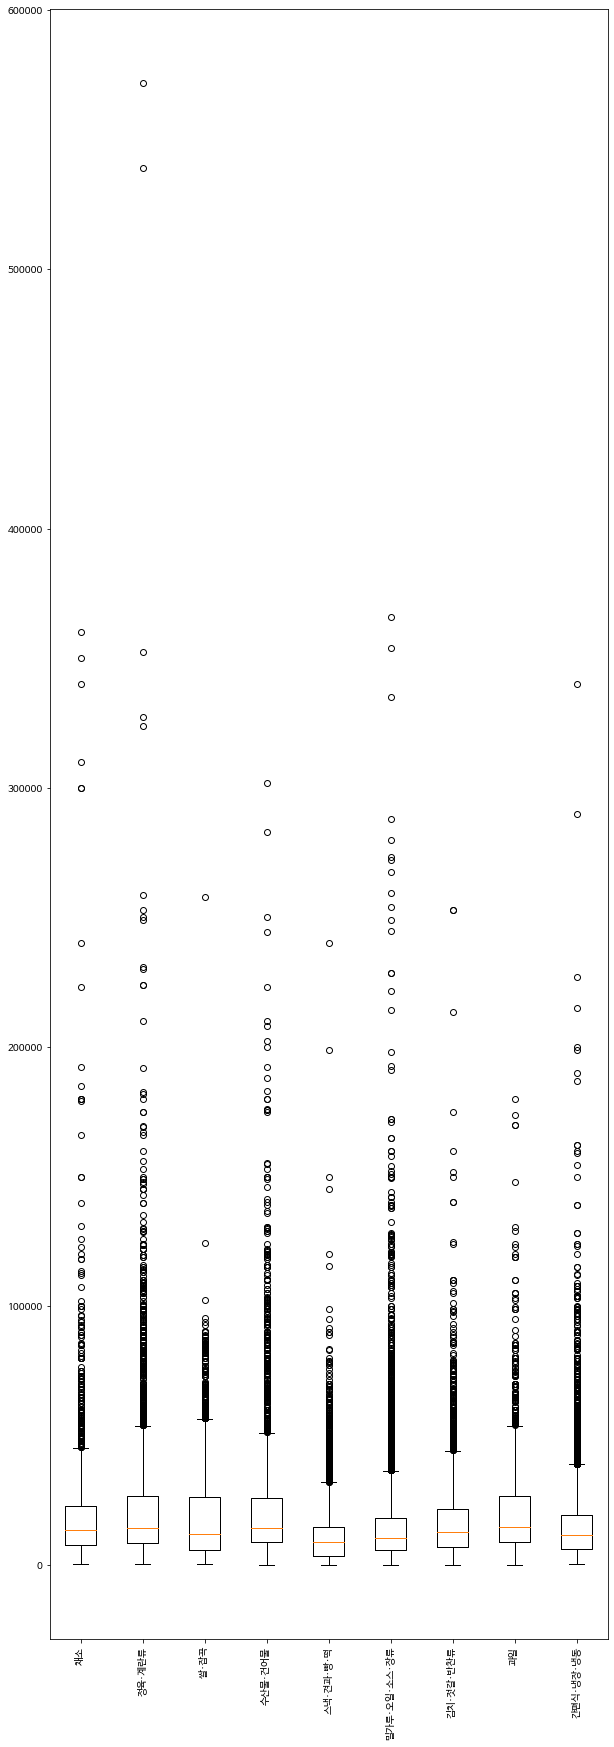

In [ ]:
tmp = []
print("카테고리별 가격 평균")
for i in range(9):
    tmp.append(df[i].price)
    print(category_name[i], ":", round(np.mean(df[i].price)))
plt.figure(figsize=(10,30))
plt.boxplot(tmp)
plt.xticks([i for i in range(1,10)], category_name, rotation = 90)
plt.show()

#### 재고
카테고리별 품절 상품 갯수

In [16]:
for i in range(9):
    data = df[i]
    print(category_name[i], np.sum(data.stocks == 0), "\n", round(np.sum(data.stocks == 0) / len(data) * 100, 2), "%")

채소 9 
 0.32 %
정육·계란류 9 
 0.25 %
쌀·잡곡 7 
 0.24 %
수산물·건어물 46 
 0.77 %
스낵·견과·빵·떡 42 
 0.31 %
밀가루·오일·소스·장류 15 
 0.16 %
김치·젓갈·반찬류 17 
 0.32 %
과일 20 
 0.85 %
간편식·냉장·냉동 50 
 0.43 %


In [17]:
# 전처리 - 재고 없는거 날림
prod = prod[prod.stocks == 1]

#### 만족도
prod_satis: 0인게 거의 반을 차지하는데 이거 뭐지? 만족도 0인거 직접 url 타고 들어가보면 리뷰 짱많고 만족도 0도 아님

In [18]:
len(prod)

57288

In [19]:
prod[prod.prod_satis == 0] # 고찰

,prod_idx,image,title,category,price,stocks,prod_satis,prod_url,buy_count,category_num,small_category
85,4420046666,http://th2.tmon.kr/thumbs/image/c16/22c/206/c6...,[퍼스트위크] 티몬블랙딜 첫수확 호박고구마 한입2KG 외 무농약고구마 사이즈별 모음...,"[식품·건강, 채소, 감자·고구마·당근·뿌리채소, 고구마]",5900,1,0.0,http://www.tmon.co.kr/deal/4420046666\n,1145,0,고구마
168,4433088682,http://img3.tmon.kr/cdn3/deals/2020/09/29/4433...,[퍼스트위크] 티몬블랙딜 선착순 20%쿠폰할인+9월수확 해남 꿀밤고구마 한입 2.5...,"[식품·건강, 채소, 감자·고구마·당근·뿌리채소, 고구마]",5900,1,0.0,http://www.tmon.co.kr/deal/4433088682\n,516,0,고구마
340,4428586066,http://th3.tmon.kr/thumbs/image/482/850/093/e0...,[퍼스트위크] 신선무료배송 봉팔형님 햇 밤꿀고구마 꿀고구마 4종 크기별 모음 2개 ...,"[식품·건강, 채소, 감자·고구마·당근·뿌리채소, 고구마]",6900,1,0.0,http://www.tmon.co.kr/deal/4428586066\n,152,0,고구마
365,4415038114,http://img1.tmon.kr/cdn3/deals/2019/11/19/2724...,국산 한입 산앤들 햇고구마 2.5kg / 2BOX 구매시 1kg 추가증정,"[식품·건강, 채소, 감자·고구마·당근·뿌리채소, 고구마]",5900,1,0.0,http://www.tmon.co.kr/deal/4415038114\n,108,0,고구마
501,3256455554,http://img2.tmon.kr/cdn3/deals/2020/03/16/3256...,[국내배송] 청정지역 울릉도 부지갱이 나물밥 만들기,"[식품·건강, 채소, 버섯·나물·건채소, 건나물]",4000,1,0.0,http://www.tmon.co.kr/deal/3256455554\n,53,0,건나물
...,...,...,...,...,...,...,...,...,...,...,...
14586,4456721230,http://img4.tmon.kr/cdn3/deals/2020/09/29/4456...,크라운)마이쮸(포도.사과) 간식용카라멜 사과마이쮸 캔디 간식용캔디 과즙카라멜,"[식품·건강, 간편식·냉장·냉동, 양념·육가공·수산, 기타]",6820,1,0.0,http://www.tmon.co.kr/deal/4456721230\n,0,8,기타
14587,4456721130,http://img4.tmon.kr/cdn3/deals/2020/09/29/4456...,오뚜기 펜네(오뚜기500g) 펜네파스타 식당용파스타면 다용도펜네 파스타면 대용량펜네,"[식품·건강, 간편식·냉장·냉동, 양념·육가공·수산, 기타]",4810,1,0.0,http://www.tmon.co.kr/deal/4456721130\n,0,8,기타
14588,4456721122,http://img2.tmon.kr/cdn3/deals/2020/09/29/4456...,오뚜기 참치죽(285g) 즉석요리식품 즉석밥류 죽 즉석식품 간편죽,"[식품·건강, 간편식·냉장·냉동, 양념·육가공·수산, 기타]",4630,1,0.0,http://www.tmon.co.kr/deal/4456721122\n,0,8,기타
14589,4456721070,http://img2.tmon.kr/cdn3/deals/2020/09/29/4456...,오뚜기 새송이쇠고기죽(285g) 일회용죽 즉석요리 일회용식품 즉석죽 인스턴트식품,"[식품·건강, 간편식·냉장·냉동, 양념·육가공·수산, 기타]",4630,1,0.0,http://www.tmon.co.kr/deal/4456721070\n,0,8,기타


#### 구매 횟수
- 전처리: 구매 이력이 없는 상품 삭제
- 기간이 정해지지 않아 좀 의미 없는듯

In [ ]:
# 고찰 - 구매 이력 몇개 이하인 것 삭제해야 하는지
for i in range(6):
    print(i, "개 이하", round(len(prod[prod.buy_count <= i]) / len(prod) * 100, 2), "%")

0 개 이하 1.55 %
1 개 이하 18.21 %
2 개 이하 26.93 %
3 개 이하 33.39 %
4 개 이하 38.76 %
5 개 이하 43.48 %


# Review

In [ ]:
review.head()

,review_idx,prod_idx,prod_satis,ship_satis,select_options,buy_date,review_date,use_opt1,use_satis1,use_opt2,use_satis2,content,user_id,memberSrl
0,168513546,2865723582,5,5,01_★추천★꿀고구마 정품 중1kg(2개 주문시 3kg 발송),01_★추천★꿀고구마 정품 중1kg(2개 주문시 3kg 발송),2020-10-06 17:04:25,맛,맛있어요,신선도,신선해요,맛있어요 오자마자 구워서 다 먹었네요 또 주문해야겠어요~~^^,nai*****,25328917
1,168507310,2865723582,3,3,01_★추천★꿀고구마 정품 중1kg(2개 주문시 3kg 발송),01_★추천★꿀고구마 정품 중1kg(2개 주문시 3kg 발송),2020-10-06 16:40:40,맛,보통이에요,신선도,적당해요,가격대비 먹을만합니다,web***,17602177
2,168500798,2865723582,3,5,02_★추천★꿀고구마 정품 특상1kg (2개 주문시 3kg 발송),02_★추천★꿀고구마 정품 특상1kg (2개 주문시 3kg 발송),2020-10-06 16:14:18,맛,아쉬워요,신선도,아쉬워요,너무 안달아요... ㅜㅜ,mye******,14115973
3,168489442,2865723582,5,5,05_꿀밤고구마 못난이2kg(2개 주문시 10kg 발송),05_꿀밤고구마 못난이2kg(2개 주문시 10kg 발송),2020-10-06 15:25:44,맛,맛있어요,신선도,신선해요,좋아요좋아요좋아요좋아요좋아요,sln****,101994422
4,168482946,2865723582,5,5,02_★추천★꿀고구마 정품 특상1kg (2개 주문시 3kg 발송),02_★추천★꿀고구마 정품 특상1kg (2개 주문시 3kg 발송),2020-10-06 15:00:29,맛,보통이에요,신선도,적당해요,진짜 달았어요 ㅎㅎ완전 곡굼아 최고ㅔ,sec***,34974293


In [20]:
def to_datetime(x):
    if x != "": return datetime.datetime.strptime(x[:10], "%Y-%m-%d")

review["review_date"] = review.review_date.apply(lambda x: to_datetime(x)) # 전처리 - datetime 형태 변환
review = review.merge(prod[['prod_idx', 'category_num', 'title', 'small_category']]) # 전처리 - 카테고리 넘버 merge 시켜줌

In [21]:
# 날짜는 NA값이 많음
review.isna().sum()

review_idx             0
prod_idx               0
prod_satis             0
ship_satis             0
select_options         0
buy_date               0
review_date       403956
use_opt1               0
use_satis1             0
use_opt2               0
use_satis2             0
content                0
user_id                0
memberSrl              0
category_num           0
title                  0
small_category         0
dtype: int64

#### 인기 상품
크롤링 날짜(2020-10-07) 기준 2주 top50 상품

##### 전체 top50

In [22]:
review_2weeks = review[review.review_date > '2020-09-22'] # 2주
top = pd.DataFrame(review_2weeks["prod_idx"].value_counts().head(50)).reset_index()
top.columns = ['prod_idx', 'count']
top_all = pd.merge(top, prod[['prod_idx', 'title', 'category_num', 'small_category']])
top_all["category_name"] = top_all.category_num.apply(lambda x: category_name[x])
top_all

,prod_idx,count,title,category_num,small_category,category_name
0,3873456926,2211,[허닭] 닭가슴살/볶음밥/소세지부터 도시락까지 골라담기 / 구매 금액별 사은품 증정,1,기타 닭고기,정육·계란류
1,4391378250,1734,[퍼스트위크] 티몬블랙딜 켈로그 첵스초코570g 1+1 외 인기시리얼&프링글스 77...,4,시리얼,스낵·견과·빵·떡
2,4284526834,1514,[퍼스트위크] 티몬블랙딜 입소문의 말랑떡볶이 보통맛 / 튀김 / 구매수량별 사은품까...,8,떡볶이,간편식·냉장·냉동
3,4427127746,1232,[퍼스트위크] 티몬블랙딜 깨비농원 극조생 감귤 3kg 로얄소과 품질엄선 /2개구매시...,7,귤,과일
4,4264247790,1232,[퍼스트위크] 필수특가 삼시세떡 국물떡볶이 320g 외 야끼만두 김말이,8,떡볶이,간편식·냉장·냉동
5,4337519418,1154,2020 씨없는 청도반시 5KG 60과이상,7,감,과일
6,2755309234,927,[퍼스트위크] 히트상품 명동칼국수 마늘김치 2kg 외5종,6,기타,김치·젓갈·반찬류
7,4388075594,812,[퍼스트위크] 티몬블랙딜 2020 햇 청도반시 5KG 외 추석 반건시 선물세트 올인원,7,감,과일
8,3223462394,791,[퍼스트위크] 티몬블랙딜 오쿡 닭가슴살 1+1+1+1 외 33종 2900원 균일가 ...,8,닭가슴살,간편식·냉장·냉동
9,2961545794,778,[퍼스트위크] 히트상품 [신한수산] 20%선착순쿠폰+국내산 왕새우 1kg,3,새우,수산물·건어물


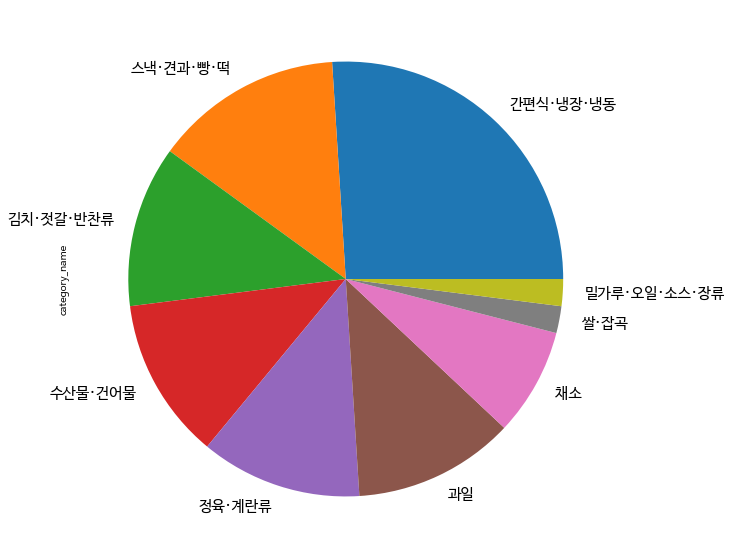

In [23]:
top_all.category_name.value_counts().plot.pie(figsize=(10,10), fontsize=15) # 전체 top50의 카테고리 분포

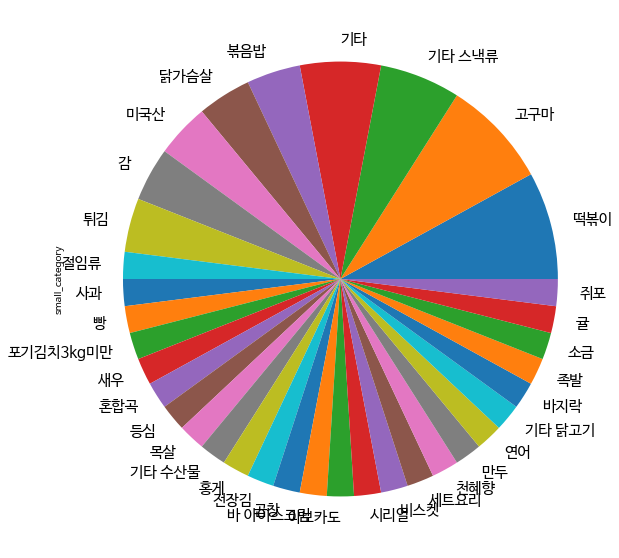

In [24]:
top_all.small_category.value_counts().plot.pie(figsize=(10,10), fontsize=15) # 전체 top50의 세부 카테고리 분포

##### 카테고리별 top10

In [25]:
top_50_category = []
for i in range(9):
    top_50_category.append(review_2weeks[review_2weeks.category_num == i])

In [26]:
top_50 = []
for i in range(9):
    tmp = pd.DataFrame(top_50_category[i]["prod_idx"].value_counts().head(50)).reset_index()
    tmp.columns = ['prod_idx', 'count']
    tmp = pd.merge(tmp, prod[['prod_idx', 'title', 'category_num', 'small_category']])
    tmp["category_name"] = tmp.category_num.apply(lambda x: category_name[x])
    top_50.append(tmp)

,prod_idx,count,title,category_num,small_category,category_name
0,2865723582,505,[컬러푸드] 선착순20%할인쿠폰+해남 후기갑 꿀고구마 중상1kg 정품\n한입/특상/...,0,고구마,채소
1,4293796290,318,[퍼스트위크] 티몬블랙딜 햇수확 해남 한입 꿀밤고구마3.5kg 외 사이즈별 모음 /...,0,고구마,채소
2,4125298018,264,[퍼스트위크] 티몬블랙딜 첫수확 정품 해남 햇 꿀밤고구마 한입 2kg / 특상 1kg,0,고구마,채소
3,4251744310,236,[퍼스트위크] 티몬블랙딜 봉팔형님 햇 밤꿀고구마 3.5kg 외 꿀고구마 5종 크기별...,0,고구마,채소
4,4374372042,201,[퍼스트위크] 티몬블랙딜 첫출하 해남 호박고구마 한입3kg 외 사이즈별 모음/ 2개...,0,고구마,채소


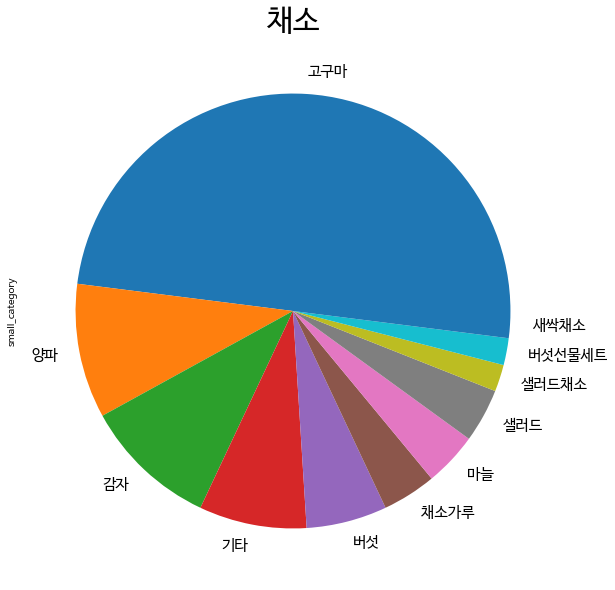

,prod_idx,count,title,category_num,small_category,category_name
0,3873456926,2211,[허닭] 닭가슴살/볶음밥/소세지부터 도시락까지 골라담기 / 구매 금액별 사은품 증정,1,기타 닭고기,정육·계란류
1,4392333498,385,[퍼스트위크] 필수특가 호주산 LA갈비(찜용/YP등급)1kg,1,미국산,정육·계란류
2,2866282158,356,[퍼스트위크] 티몬블랙딜 부채살600g 초이스등급 외 척아이롤/삼겹살1kg/목살 모음전,1,미국산,정육·계란류
3,4213950442,274,[퍼스트위크] 티몬블랙딜 국내산 한돈 뒷고기 1.3kg/돼지갈비/왕소금구이/캠핑용 ...,1,목살,정육·계란류
4,4116433646,273,20%할인쿠폰 도드람한돈 특수부위 3종 도깨비살/등심꽃살/토시살 외 한돈 골라담기,1,기타,정육·계란류


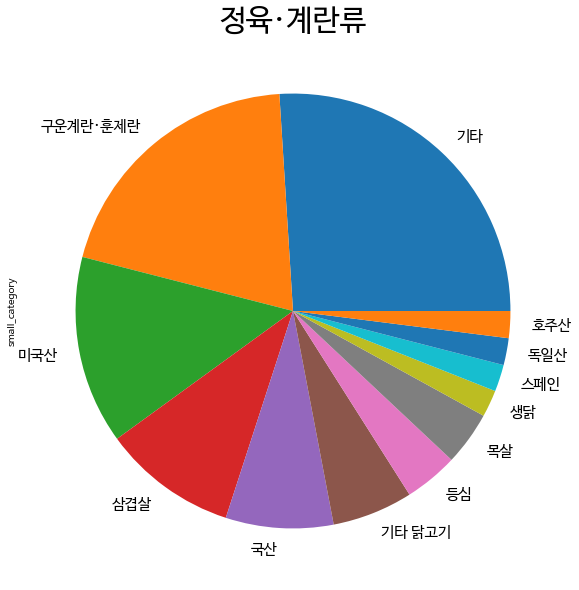

,prod_idx,count,title,category_num,small_category,category_name
0,4246780742,460,[퍼스트위크] 필수특가 월드그린 잡곡 500g 8종 현미/찰보리/귀리/강낭콩/완두콩...,2,혼합곡,쌀·잡곡
1,2371634466,92,[홍천철원] 20년 햅쌀 영양쌀 20kg,2,쌀 10kg,쌀·잡곡
2,1693263726,78,[현대농산] 발아현미21곡 600g 3봉,2,혼합곡,쌀·잡곡
3,3417072794,59,맛좋은 영양쌀 20kg / 최근도정,2,쌀 20kg,쌀·잡곡
4,3756256402,55,"[트래블경북] 5,000원쿠폰 농협 삼광쌀 10kg /20kg 고가미",2,쌀 20kg,쌀·잡곡


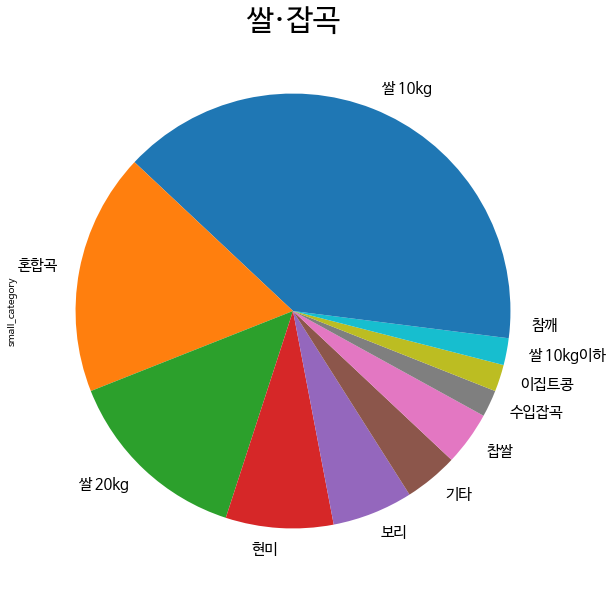

,prod_idx,count,title,category_num,small_category,category_name
0,2961545794,778,[퍼스트위크] 히트상품 [신한수산] 20%선착순쿠폰+국내산 왕새우 1kg,3,새우,수산물·건어물
1,4262797202,313,[퍼스트위크] 필수특가 프리미엄 대쥐포 5장 외 6종 건어물모음전,3,쥐포,수산물·건어물
2,4395861874,287,[퍼스트위크] 히트상품 회로먹는 햇 딱새우 200g+200g+200g 60마리내외+...,3,기타 수산물,수산물·건어물
3,4391437998,263,100% 남해안 왕 바지락1.5kg/ 2개 구매시 생칼국수 450g 증정,3,바지락,수산물·건어물
4,4194687430,244,[퍼스트위크] 티몬블랙딜 슈페리어 생연어 꽉찬 몸통살 1kg+미니간장/와사비 외 연...,3,연어,수산물·건어물


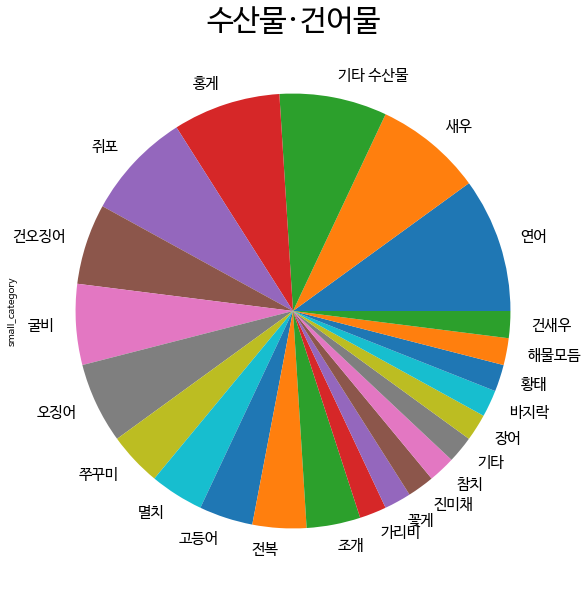

,prod_idx,count,title,category_num,small_category,category_name
0,4391378250,1734,[퍼스트위크] 티몬블랙딜 켈로그 첵스초코570g 1+1 외 인기시리얼&프링글스 77...,4,시리얼,스낵·견과·빵·떡
1,4347884570,573,[퍼스트위크] 필수특가 신세계베이커리 카스테라 1+1 외,4,빵,스낵·견과·빵·떡
2,4430584618,444,[퍼스트위크] 필수특가 해태제과 홈런볼 46gX10봉,4,기타 스낵류,스낵·견과·빵·떡
3,2976219878,295,[퍼스트위크] 히트상품 국가대표 스낵 990원 균일가 골라담기/라면/음료/젤리/대용식,4,기타 스낵류,스낵·견과·빵·떡
4,4346633114,269,프롬 커피크래커 1+1외 간식모음전,4,비스켓,스낵·견과·빵·떡


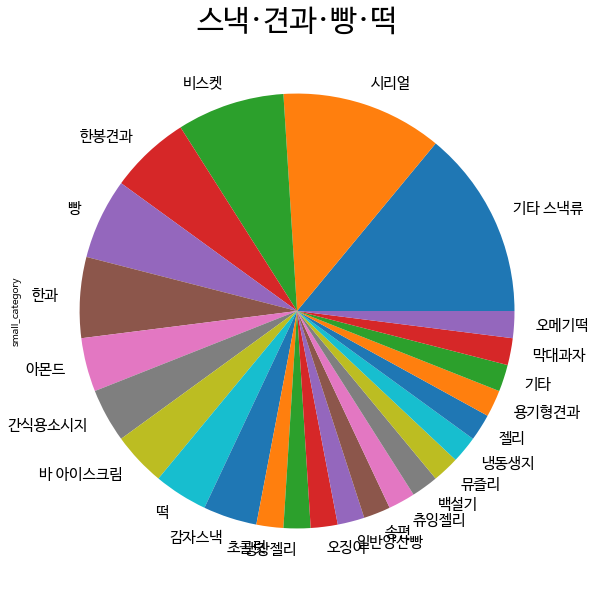

,prod_idx,count,title,category_num,small_category,category_name
0,4415553642,752,[퍼스트위크] 티몬블랙딜 히말라야 핑크솔트 300G+300G+그라인더 선물용/실속용,5,소금,밀가루·오일·소스·장류
1,2848481726,40,[퍼스트위크] 무한타임 건강한 무방부제 무설탕 수제잼 3종 250g / 2개이상구매...,5,과일잼,밀가루·오일·소스·장류
2,3082175298,36,[퍼스트위크] 무한타임 스푸마켓 베트남 요리재료 모음/ 쌀국수 반미 소스 외,5,양념소스,밀가루·오일·소스·장류
3,4313810658,36,복음자리 2020 추석선물세트 모음전,5,과일잼,밀가루·오일·소스·장류
4,4258085394,35,[밥상마루] 참기름 들기름 참깨 선물세트 +기프트쇼핑백 증정,5,참기름,밀가루·오일·소스·장류


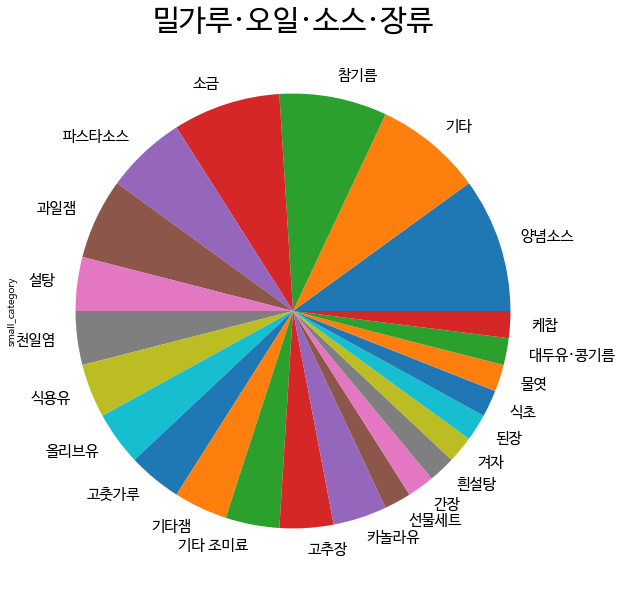

,prod_idx,count,title,category_num,small_category,category_name
0,2755309234,927,[퍼스트위크] 히트상품 명동칼국수 마늘김치 2kg 외5종,6,기타,김치·젓갈·반찬류
1,4189699918,406,[퍼스트위크] 필수특가 1천원쿠폰 개당590원 대천파래김 10봉세트 전장대천김/파래...,6,전장김,김치·젓갈·반찬류
2,4247201250,366,[퍼스트위크] 필수특가 1+1 간장 깐새우장1kg 30미 외 총 7종 다시없을 가격...,6,절임류,김치·젓갈·반찬류
3,2470872970,278,[퍼스트위크] 히트상품 장순필 가마솥 순대탕 4+1 외 인기상품 모음전,6,기타,김치·젓갈·반찬류
4,4361125642,257,뜨끈한 우동10인분세트 / 우동사리10봉+우동소스10봉 / 2세트이상 구매시 사은품...,6,세트요리,김치·젓갈·반찬류


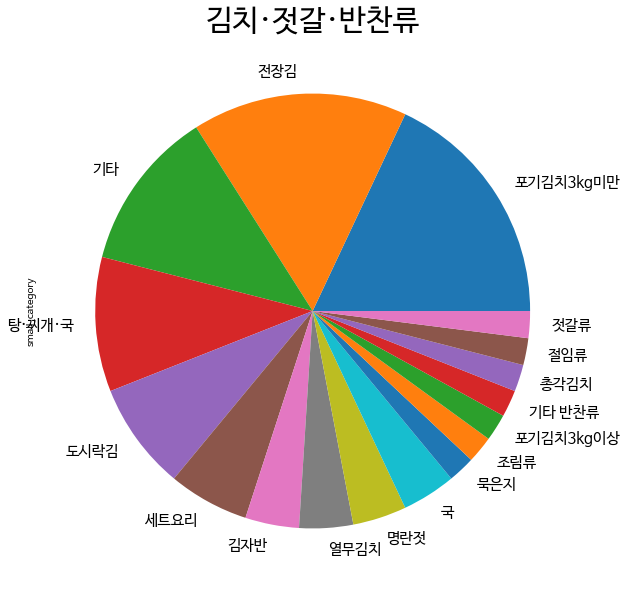

,prod_idx,count,title,category_num,small_category,category_name
0,4427127746,1232,[퍼스트위크] 티몬블랙딜 깨비농원 극조생 감귤 3kg 로얄소과 품질엄선 /2개구매시...,7,귤,과일
1,4337519418,1154,2020 씨없는 청도반시 5KG 60과이상,7,감,과일
2,4388075594,812,[퍼스트위크] 티몬블랙딜 2020 햇 청도반시 5KG 외 추석 반건시 선물세트 올인원,7,감,과일
3,4384943870,708,[퍼스트위크] 티몬블랙딜 깨비농원 황금향 2.5kg/추석선물세트 3kg/중대과이상 ...,7,천혜향,과일
4,4242633682,507,영주 홍로사과 2.5kg내외 /실중량 16과내외,7,사과,과일


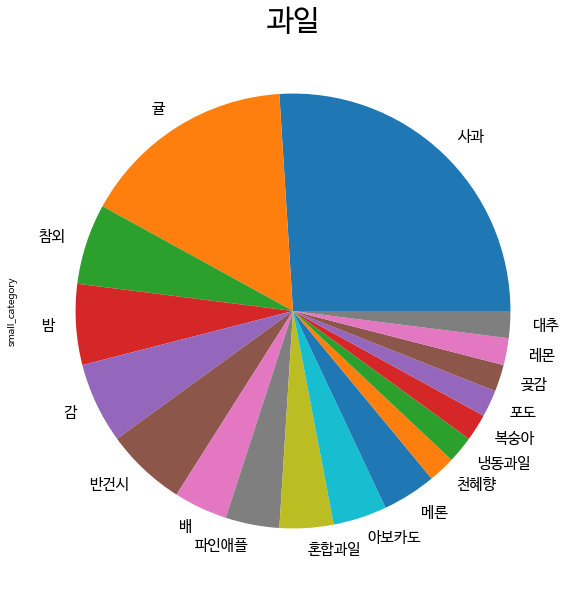

,prod_idx,count,title,category_num,small_category,category_name
0,4284526834,1514,[퍼스트위크] 티몬블랙딜 입소문의 말랑떡볶이 보통맛 / 튀김 / 구매수량별 사은품까...,8,떡볶이,간편식·냉장·냉동
1,4264247790,1232,[퍼스트위크] 필수특가 삼시세떡 국물떡볶이 320g 외 야끼만두 김말이,8,떡볶이,간편식·냉장·냉동
2,3223462394,791,[퍼스트위크] 티몬블랙딜 오쿡 닭가슴살 1+1+1+1 외 33종 2900원 균일가 ...,8,닭가슴살,간편식·냉장·냉동
3,4069161210,722,[퍼스트위크] 티몬블랙딜 통통떡볶이1-2인분 외 순대/튀김/어묵/핫바 모음,8,떡볶이,간편식·냉장·냉동
4,4390408290,552,[퍼스트위크] 티몬블랙딜 천일 볶음밥 10봉+떡갈비1봉 골라담기/야채/김치/새우/라...,8,볶음밥,간편식·냉장·냉동


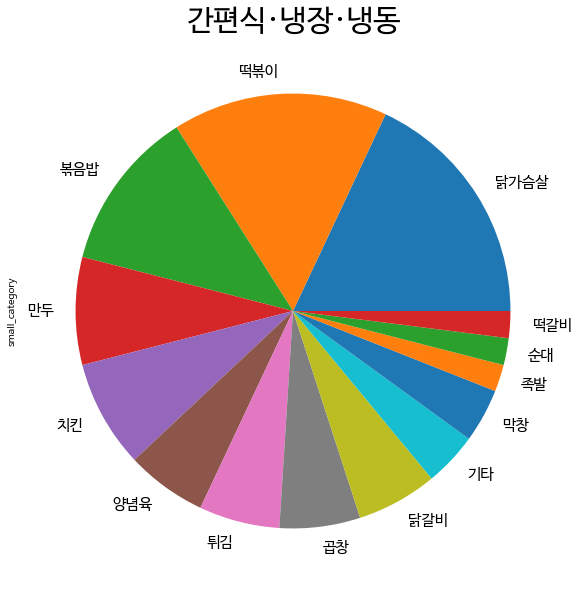

In [27]:
for i in range(9):
    display(top_50[i].head(5))
    top_50[i].small_category.value_counts().plot.pie(figsize=(10,10), fontsize=15) # 전체 top50의 카테고리 분포
    plt.title(category_name[i], size=30)
    plt.show()

#### 스테디 셀러
30주 이상 평균 판매량보다 더 높은 판매량을 달성한 제품

In [37]:
review_yes_date = review[review.review_date.notna()] # 날짜가 있는 데이터만 사용
print(review_yes_date.review_date.min(), review_yes_date.review_date.max())
print(review_yes_date.review_date.max() - review_yes_date.review_date.min())

2020-01-10 00:00:00 2020-10-07 00:00:00
271 days 00:00:00


In [131]:
def weekly(start, end):
    return pd.DataFrame(review_yes_date[review_yes_date.review_date >= start][review_yes_date.review_date <= end])

In [ ]:
steady = pd.DataFrame(review_yes_date.groupby("prod_idx")["review_idx"].count())
steady["over_sales"] = 0

In [223]:
for i in range(39):
    start = datetime.datetime.strftime(datetime.datetime(2020, 1, 10) + datetime.timedelta(weeks = i), "%Y-%m-%d")
    end = datetime.datetime.strftime(datetime.datetime(2020, 1, 10) + datetime.timedelta(weeks = i+1), "%Y-%m-%d")
    sales_mean = np.mean(weekly(start, end).groupby("prod_idx")["content"].count().values) # 각 주의 평균 판매량
    steady.loc[(weekly(start, end).groupby("prod_idx")["review_idx"].count()[weekly(start, end).groupby("prod_idx")["review_idx"].count() > sales_mean]).index, 'over_sales'] += 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  

In [242]:
steady_idx = steady[steady.over_sales > 30].index

In [243]:
len(steady_idx)

205

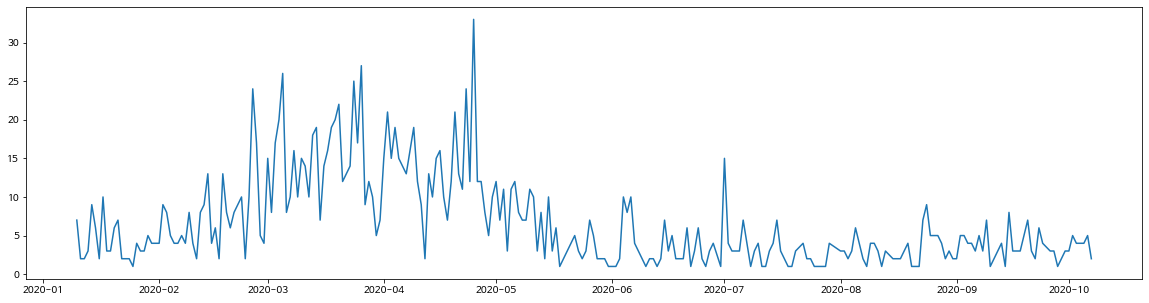

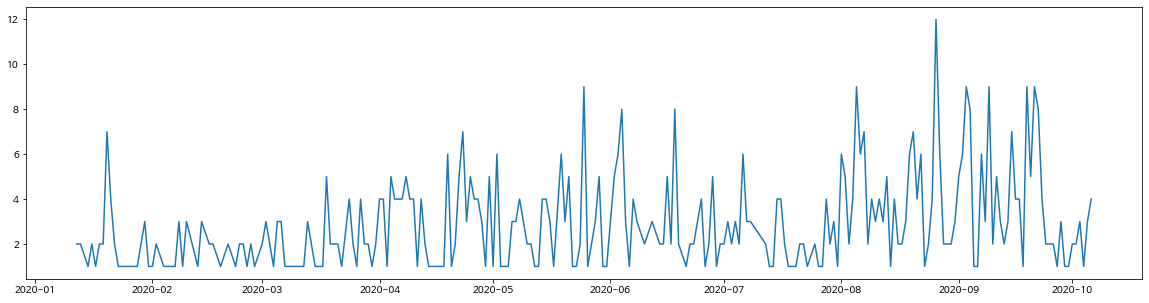

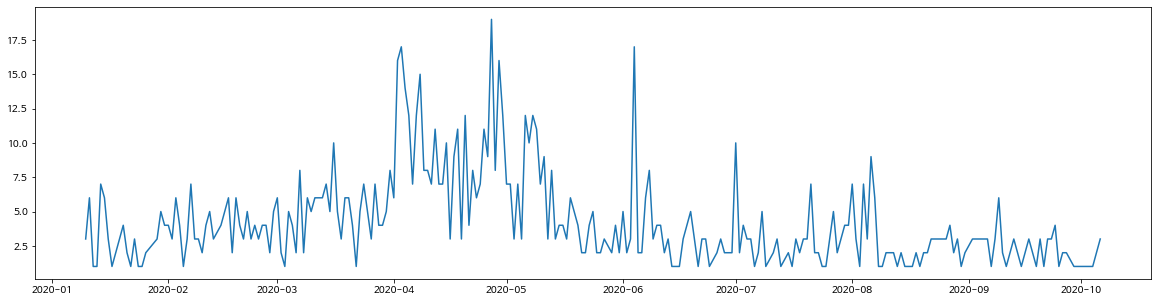

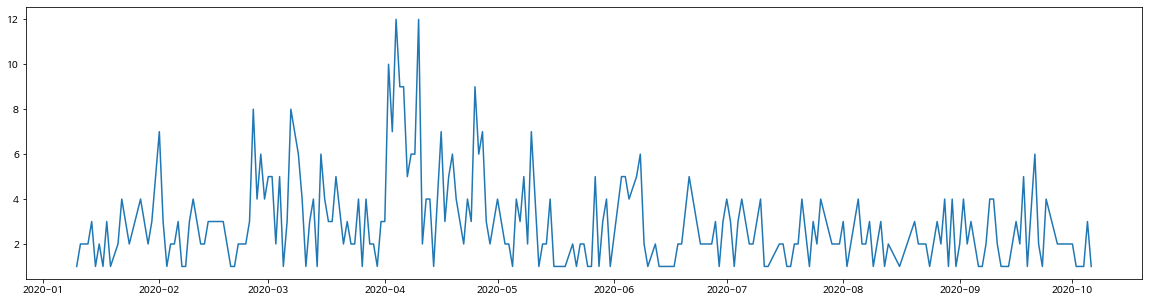

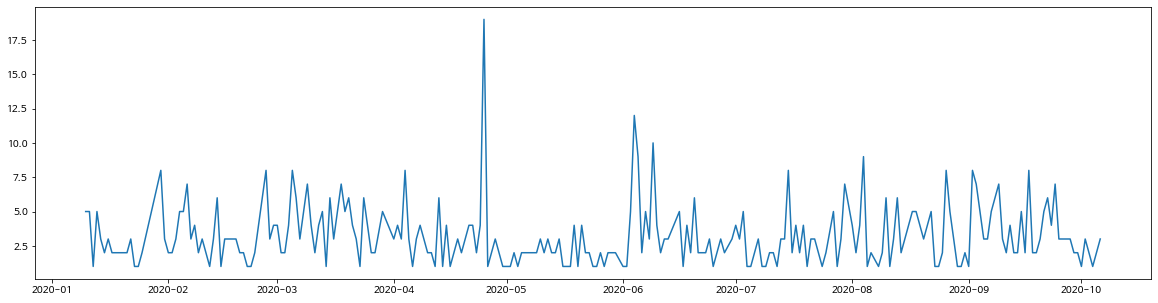

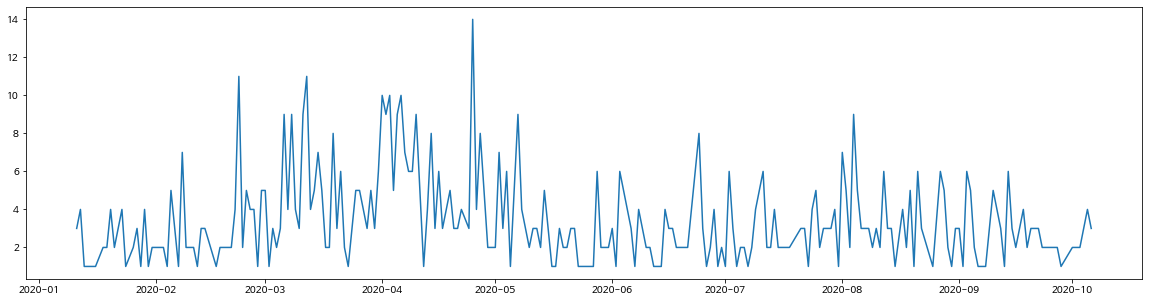

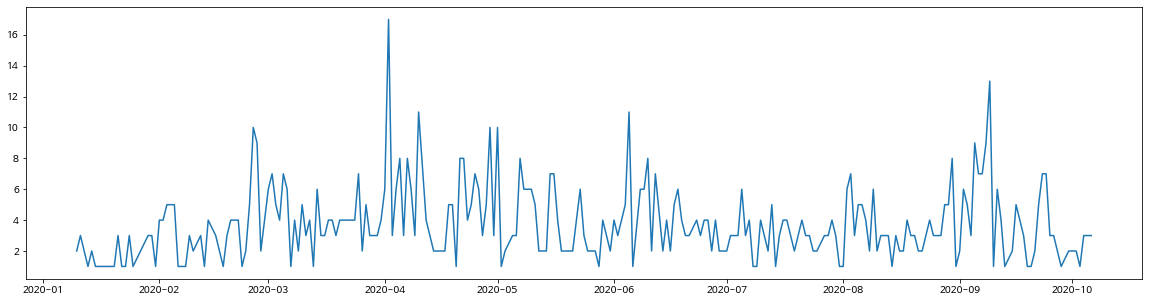

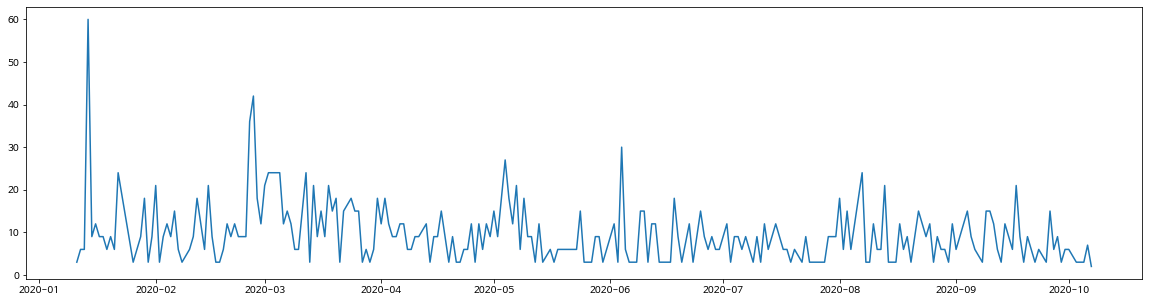

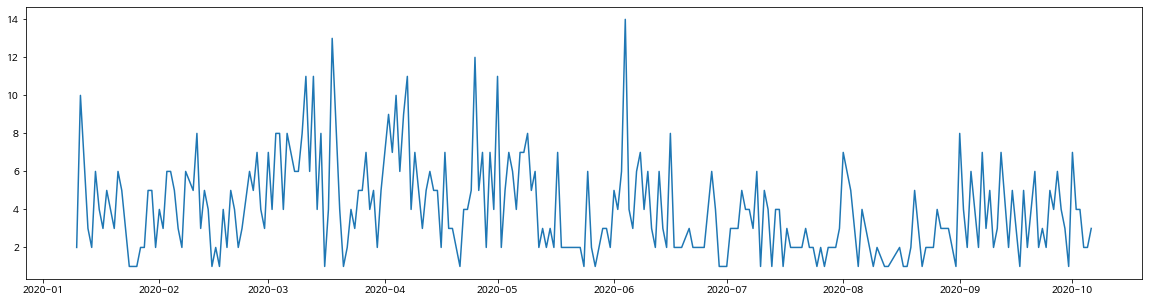

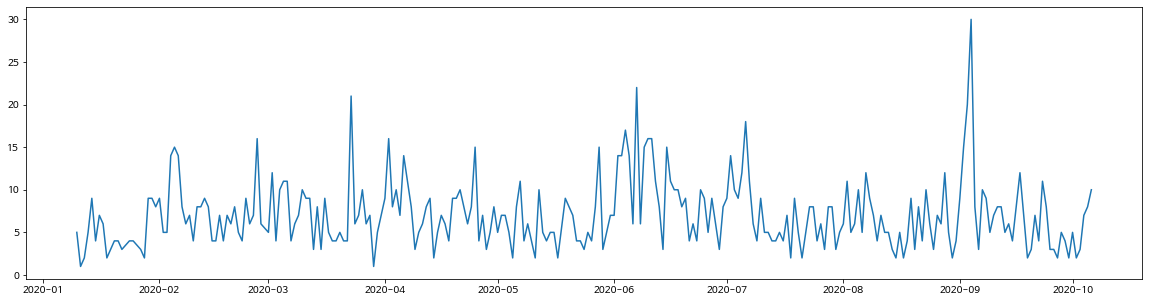

In [241]:
# 판매량 시각화 예시 10개
for i in range(10):
    plt.figure(figsize = (20,5))
    tmp = list(review_yes_date[review_yes_date.prod_idx ==steady_idx[i]].groupby(["prod_idx", "review_date"])["review_idx"].count())
    tmp_date = review_yes_date[review_yes_date.prod_idx ==steady_idx[i]].groupby("review_date").sum()["review_idx"].index
    plt.plot(tmp_date, tmp)
    plt.show()

In [266]:
prod_steady = prod.set_index("prod_idx").loc[steady_idx]
prod_steady["category_name"] = prod_steady.category_num.apply(lambda x: category_name[x])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

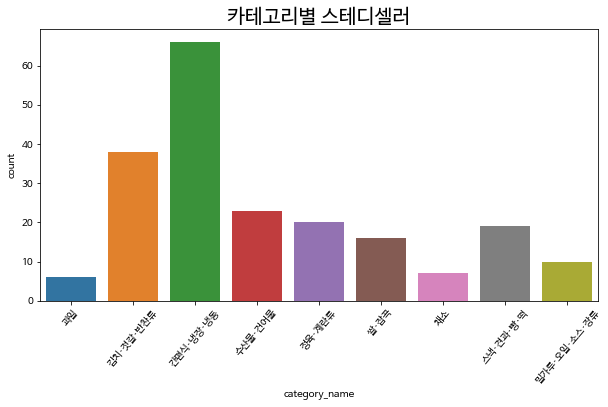

In [279]:
plt.figure(figsize=(10,5))
sns.countplot(prod_steady.category_name)
plt.title("카테고리별 스테디셀러", size=20)
plt.xticks(rotation=50)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86]), <a list of 87 Text major ticklabel objects>)

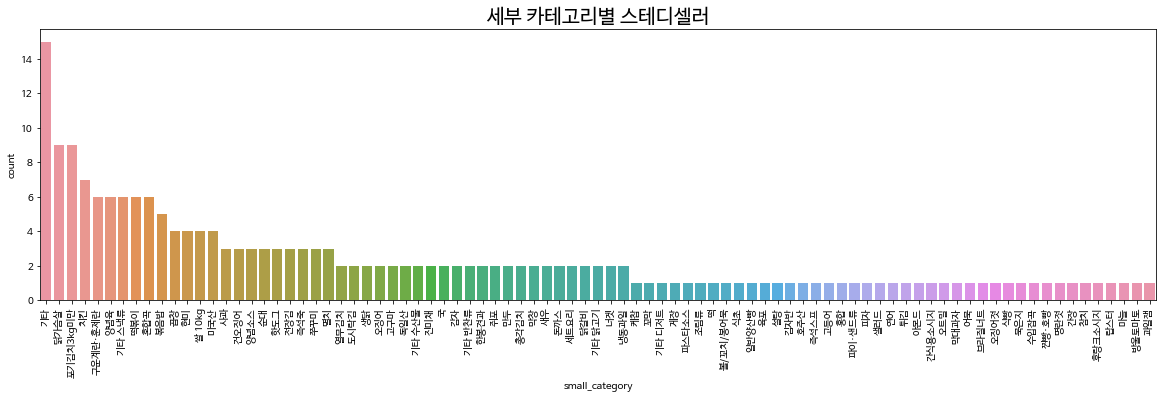

In [284]:
plt.figure(figsize=(20,5))
sns.countplot(prod_steady.small_category, order = prod_steady.small_category.value_counts().index)
plt.title("세부 카테고리별 스테디셀러", size=20)
plt.xticks(rotation=90)

# Satisfaction

In [ ]:
satisfaction.head()

,prod_idx,avg_seller_prod_satis,avg_seller_ship_satis,use_opt1,avg_use_satis1,use_opt2,avg_use_satis2,prod_satis,prod_url
0,2865723582,83,88,맛,61,신선도,48,4.4,http://www.tmon.co.kr/deal/2865723582\n
1,512851998,93,93,신선도,74,맛,72,4.5,http://www.tmon.co.kr/deal/512851998\n
2,760761146,93,93,맛,62,신선도,54,4.4,http://www.tmon.co.kr/deal/760761146\n
3,212815213,92,93,,0,,0,4.3,http://www.tmon.co.kr/deal/212815213\n
4,3030712126,86,89,맛,62,신선도,49,4.4,http://www.tmon.co.kr/deal/3030712126\n


# 상품별 만족도, 구매횟수, 리뷰의 상관관계
추가적인 전처리는 진행 안 함

In [300]:
relation = pd.merge(prod[['prod_idx', 'buy_count']], review.groupby('prod_idx')[['review_idx']].count().reset_index())
relation = pd.merge(relation, satisfaction[['prod_idx', 'avg_seller_prod_satis']])
relation.set_index('prod_idx', inplace = True)

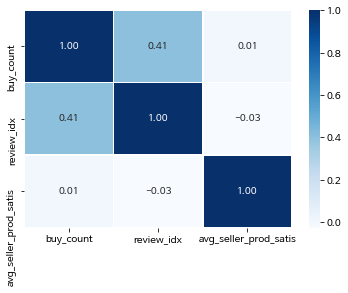

In [306]:
sns.heatmap(data = relation.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')